# Linear regression for prediction

Signification des émoticones :
- 🌞 : documentations importantes
- 👀 : documentations intéressantes à connaître
- 🌚 : en complément
- (vide) : à vous de voir

-------

For the remainder of the module we will look at using linear regression in a more algorithmic/computer science/machine learning context. In this notebook we will take a more detailed look at conducting linear regression in `scikit-learn`, you will:
* write your own code to compute MSE
* Learn what training and testing sets are
* Use `scikit-learn` to perform a multiple linear regression
* Evaluate your results
* Create a model to predict housing prices


## Assesing model accuracy

We always must evaluate how 'good' our model is in order to understand how it performs. One common measure of accuracy (or error) for a regression type problem is **Mean Squared Error (MSE)**. This can be calculated using the following formula:

<div style="font-size: 120%;">  
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2, $$
</div>

where $y_i$ is the true values and $\hat{f}(x_i)$ is the predicted values by our model over $n$ samples.

### Exercise 1: write a function to calculate MSE

Given the lists of true values and predictions write a function that calculates the MSE of this data. 


HINT
* using numpy arrays will make this much easier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import metric_ton

In [2]:
true_values = [13.9, 20.3, 2.1, 8.8, 5.2]
predicted_vals = [14.3, 18.9, 3.4, 8.9, 5.0]

In [3]:
### your solution here
from sklearn.metrics import mean_squared_error
mean_squared_error(true_values, predicted_vals)

0.7720000000000011

### MSE evaluation in sklearn

`Scikit-Learn` provides a function to calculate MSE (as well as other useful performance metrics) so that you dont have to carry around your function to all the different projects you work on. We can use this to evaluate our function and check that we got the correct answer in the exercise above.

In [4]:
from sklearn.metrics import mean_squared_error

mean_squared_error(true_values, predicted_vals)

0.7720000000000011

**Task 1**: Other evaluation metrics
* Find at least 2 other metrics that exist in `Scikit-Learn` that can be used in regression problems.
* Calculate the errors of these on the hypothetical data we used above.

In [5]:
#### your solution here
from sklearn.metrics import r2_score
r2_score(true_values, predicted_vals)

0.9814576407970332

In [6]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(true_values, predicted_vals)

0.6800000000000004

In [7]:
#Calculate the errors of these on the hypothetical data we used above.????

## Training and testing sets

When building models for prediction we are most interested in building a model that will generalise well to new sets of data that we will encounter in the future. Strictly speaking what we have calculated above is a *training MSE*, which means that the calculation of MSE was performed on the same data samples the model was fitted to. 
 
One good way to asses whether our model will be useful on new data sets is to fit our model only to a subset of the data, and then use new data the model has not seen to produce a prediction which we can evaluate. We saw this process in the previous notebook when we introduced `scikit-learn` and Logistic Regression.

Here is another example:

In [8]:
from sklearn.datasets import load_diabetes
diabs = load_diabetes()

In [9]:
print(diabs.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [10]:
diabs.data.shape

(442, 10)

In [11]:
diabs.target.shape

(442,)

In [12]:
import pandas as pd

X = pd.DataFrame(diabs.data, columns=diabs.feature_names)
y = diabs.target

In [13]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [14]:
y[:5]

array([151.,  75., 141., 206., 135.])

We split the data into a test and training set.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18)

Fitting a linear regression model.

In [16]:
from sklearn.linear_model import LinearRegression

# fit model to training data
model = LinearRegression()
model.fit(X_train, y_train)

# predict y values for testing data set
y_pred_test = model.predict(X_test)

# evaluate MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print('test MSE: {0}'.format(mse_test))

test MSE: 3006.0739900867484


We can also use this model to predict values on the train set, and evaluate the MSE. Comparing the two MSE scores gives us information on whether the model is overfitting or not. Normally we would compare these scores with other types of models (for example *support vector machines* or *random forests*...) that we have built in order to understand which model is best for the particular problem we are trying to solve. We almost always expect the *training error* to be lower than the *test error* (i.e. our performance reduces, or MSE increases) slightly when we move to new data the model has not seen.

In [17]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('training MSE: {0}'.format(mse_train))

training MSE: 2864.893003573059


## Note: interpreting MSE

MSE is not particularly intuitive to help understand how well your model predicts. In order to interpret how well our model is doing we could convert MSE to something with similar units to the target variable by taking the square root. This would be **Root Mean Squared Error** or **RMSE**.

<br/>

<div style="font-size: 120%;">
$$ RMSE = \sqrt{MSE}$$
</div>

In [18]:
import numpy as np

In [19]:
rmse_test = np.sqrt(mse_test)
print('RMSE: {0}'.format(rmse_test))

RMSE: 54.82767540290896


If we do some simple descriptive stats on the target variable for the training set, we can see that our model is finding a solution on average within one standard deviation of the variance of the target. This type of analysis can give us some confidence whether our model is remotely useful or not!

In [20]:
mean  = np.mean(y_train)
std = np.std(y_train)
print('Mean (standard deviation) values of target variables in train set: {0} ({1})'.format(mean, std))

Mean (standard deviation) values of target variables in train set: 150.93655589123867 (76.63854952919398)


RMSE, MSE, R2 squared: further reading

* 🌚 https://stats.stackexchange.com/questions/242787/how-to-interpret-root-mean-squared-error-rmse-vs-standard-deviation
* 🌚 https://setosa.io/ev/ordinary-least-squares-regression/
* 👀 https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

## Correlation between predictor variables (or features)

Correlation between two (or more) predictive variable means that there is a statistical relation between these two variables. This can be causal or not. When two variables are highle correlated (> 0.5), than they are collinear. This can be problematic.In the presence of collinearity between two or more predictors, it is difficult to isolate the impact of each of that predictor on the response. Multicollinearity has an impact on the coefficients and p values of those coefficients. But it does not impact the precision of the predictions. So depending on the goal (first notebook, classical statistics or machine learning) it is desirable to take out features that are correlated. Also in the case of ML, when we have a dataset with a large number of predictors, taking out variables that are collinear helps to reduce the dimensions and make a simpler, more stable model.


(Further reading, see page 73, 74, 99 of ILS book).
🌚 https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

Two methods:
* make a correlation matrix and decide what variables to leave out. (0.1 = moderate, 0.5 = large)
* Use variance inflaction factor method to leave out columns / features (if VIF > 5, leave out column)

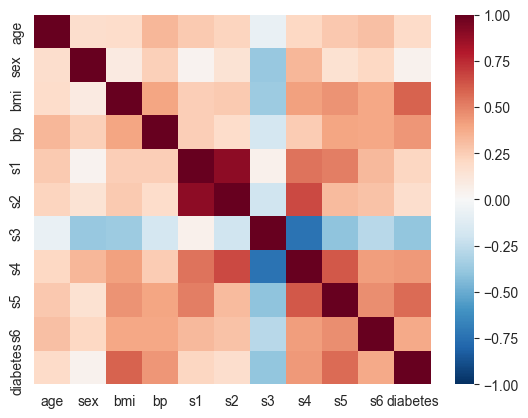

In [21]:
# Correlation matrix
df = pd.concat([X, pd.Series(y)], axis=1)
df = df.rename(columns={0:'diabetes'})

import seaborn as sns
_ = sns.heatmap(df.corr(), cmap="RdBu_r", vmin=-1, vmax=1)

From the above matrix we see that bmi (predictor) is strongly correlated to diabetes (response). As a predictor, bmi is strongly related to bp. To make a regression model we could take out bp without impacting the accuracy of the prediction of diabetes. This results in a simpler and smaller model.

In [22]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X
variables.shape
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif[vif['VIF']>5]

,VIF,features
4,59.202510,s1
5,39.193370,s2
6,15.402156,s3
7,8.890986,s4
8,10.075967,s5


Leaving out the above columns should not impact the precision of prediction. But it results in a smaller and simpler model. Also, the std error and confidence interval of the coefficients should be smaller. But be careful, deleting all features with high collinearity, may lead to deleting the feature that is the best predictor for the response. So first check the correlation between features you want to delete and the (cor)relation with the response variable.

## Exercise 2: Linear regression prediction of house prices

The California housing market is booming and, as it is the home of silicon valley, the housing company **Homes4You** have decided they want to use new data science techniques to aid their business. They want you to build a predictive model that provides the median house price for each local area across the state (These local areas are often called *'blocks'*). They will use this to help guide their agents in how to price houses.

They have gathered a data set with numerous features to assist in building your model. However, they prefer to include as few features as possible to minimize the time their agents will spend collecting data in the future.


Your mission is to apply a regression model to predict housing prices in California.
* Import the data the company has collected using the sklearn function `fetch_california_housing`
* Make a heatmap of the correlation coefficients between the variables
* Split the data into a training and testing set
* Build a linear regression model using all the variables available and print the train and test MSE scores.
* Try building other models with different combinations of variables. Print the train and test MSE scores of at least 2 of these models.
* Provide a recommendation to Homes4You of which variables you would include in the model.
* Print the train and test **RMSE** scores of your final model and explain in a few sentences to Homes4You how well your model is performing. 

In [23]:
#### your solution here
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()



In [24]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [25]:
california_housing.data.shape

(20640, 8)

In [26]:
california_housing.target.shape

(20640,)

In [27]:
x2=pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y2=california_housing.target

In [28]:
x2.shape

(20640, 8)

In [29]:
y2.shape

(20640,)

In [30]:
y2

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [31]:
x2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
y2[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

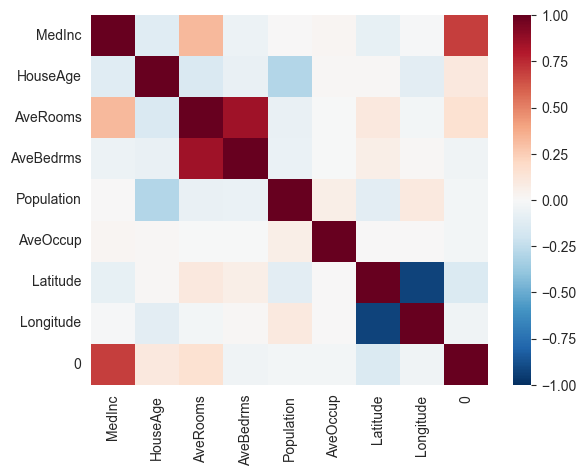

In [33]:
df = pd.concat([x2, pd.Series(y2)], axis=1)

import seaborn as sns
_ = sns.heatmap(df.corr(), cmap="RdBu_r", vmin=-1, vmax=1)

In [34]:
x2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


If removing strongly collinear features doesn’t lead to a better model, you can also try different feature combinations (for example, the one below yields similar training and testing scores).

In [35]:
# Leave out these columns and then compute the training and testing MSE
to_drop = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
x3=x2.drop(['AveRooms', 'AveBedrms', 'Population', 'AveOccup'],axis=1)
x3.head()
#réduction de modéles

,MedInc,HouseAge,Latitude,Longitude
0,8.3252,41.0,37.88,-122.23
1,8.3014,21.0,37.86,-122.22
2,7.2574,52.0,37.85,-122.24
3,5.6431,52.0,37.85,-122.25
4,3.8462,52.0,37.85,-122.25


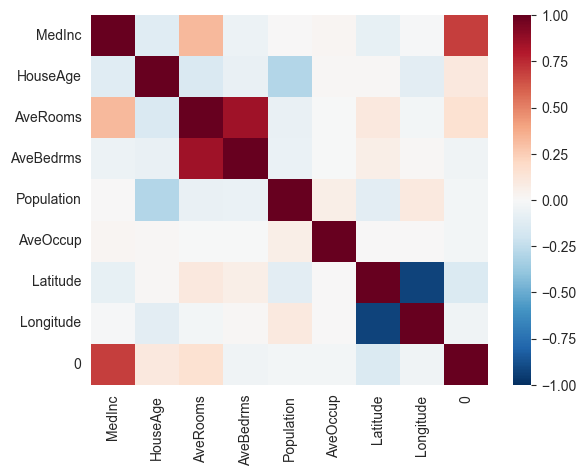

In [36]:
df = pd.concat([x2, pd.Series(y2)], axis=1)
import seaborn as sns
_ = sns.heatmap(df.corr(), cmap="RdBu_r", vmin=-1, vmax=1)

In [37]:
y2.shape, x2.shape

((20640,), (20640, 8))

In [38]:
from scipy.stats import linregress
import statsmodels.api as sm

x = sm.add_constant(x2) # an intercept term to the model
model = sm.OLS(y2, x2)
results = model.fit()

print(results.summary())
#Ici on peut voir que l'on peut supprimer la colonne population

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Wed, 15 Oct 2025   Prob (F-statistic):                        0.00
Time:                        15:02:04   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
#Training and test model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x2,y2, test_size=0.2,random_state = 20)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [40]:
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
#Regression OLS Xtest et Ytest
xtest_constant= sm.add_constant(X_test) # an intercept term to the model
model = sm.OLS(Y_test, X_test)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              4538.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):                        0.00
Time:                        15:02:12   Log-Likelihood:                         -4731.5
No. Observations:                4128   AIC:                                      9479.
Df Residuals:                    4120   BIC:                                      9530.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
#Modéle test
from sklearn.linear_model import LinearRegression

# fit model to training data
model = LinearRegression()
model.fit(X_train, Y_train)#Toujours entraine sur le 'train'

# predict y values for testing data set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# evaluate MSE
mse_test = mean_squared_error(Y_test, y_pred_test)
mse_train = mean_squared_error(Y_train, y_pred_train)
print('test MSE: {0}'.format(mse_test))
print('training MSE: {0}'.format(mse_train))

test MSE: 0.5410055769085338
training MSE: 0.5207810316431705


In [43]:
#MSE c'est le nombre d'erreur au carré
#Plus les MSE entre le train et le test sont proche, cela veux dire qu'il n'y a pas d'overfitting donc good
#Plus la MSE est bas mieux c'est

In [44]:
#Regression OLS Xtrain et Ytrain
x = sm.add_constant(X_train) # an intercept term to the model
model = sm.OLS(Y_train, X_train)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.727e+04
Date:                Wed, 15 Oct 2025   Prob (F-statistic):                        0.00
Time:                        15:02:19   Log-Likelihood:                         -19167.
No. Observations:               16512   AIC:                                  3.835e+04
Df Residuals:                   16504   BIC:                                  3.841e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
#Test Variation 1
x2['somme ave']= x2[['AveOccup','AveBedrms','AveRooms']].sum(axis=1)
x4=x2.drop(['AveRooms', 'AveBedrms', 'Population', 'AveOccup'],axis=1)


In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x4,y2, test_size=0.2,random_state = 20)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((16512, 5), (4128, 5), (16512,), (4128,))

In [48]:
y2.shape

(20640,)

In [49]:
X_train

,MedInc,HouseAge,Latitude,Longitude,somme ave
7728,2.4925,28.0,33.92,-118.13,7.023952
14565,3.2583,32.0,32.84,-117.20,8.781491
8099,3.7885,41.0,33.81,-118.22,8.163934
4772,2.6000,42.0,34.04,-118.34,8.985163
11663,5.3416,31.0,33.85,-118.02,9.294618
...,...,...,...,...,...
1607,2.9167,24.0,37.87,-122.08,7.184292
3915,3.8516,37.0,34.19,-118.52,9.147887
14729,4.4583,31.0,32.80,-117.02,9.480000
4367,5.7778,41.0,34.10,-118.27,8.250354


In [50]:
from sklearn.linear_model import LinearRegression

# fit model to training data
model = LinearRegression()
model.fit(X_train, Y_train)#Toujours entraine sur le 'train'

# predict y values for testing data set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# evaluate MSE
mse_test = mean_squared_error(Y_test, y_pred_test)
mse_train = mean_squared_error(Y_train, y_pred_train)
print('test MSE: {0}'.format(mse_test))
print('training MSE: {0}'.format(mse_train))
#J'ai réduit le nombre de variable avec un somme average sans perdre de qualité

test MSE: 0.55795605405986
training MSE: 0.5354780821055668


In [51]:
#test variation 2
x4=x4.drop(['somme ave'],axis=1)

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x4,y2, test_size=0.2,random_state = 20)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((16512, 4), (4128, 4), (16512,), (4128,))

In [53]:
from sklearn.linear_model import LinearRegression

# fit model to training data
model = LinearRegression()
model.fit(X_train, Y_train)#Toujours entraine sur le 'train'

# predict y values for testing data set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# evaluate MSE
mse_test = mean_squared_error(Y_test, y_pred_test)
mse_train = mean_squared_error(Y_train, y_pred_train)
print('test MSE: {0}'.format(mse_test))
print('training MSE: {0}'.format(mse_train))
#La suppression des colonne avg et somme ave (crée précédemment) n'affecte pas la qualité ou le nombre d'erreur du modéle

test MSE: 0.5576282580755916
training MSE: 0.5363735679703627


**Task 3: Explain this to your neighbour...**
* The training and test errors are quite close. What does this mean? 



<details><summary>HINT</summary><br>
HINT: think in terms of if we were to apply this fitted model to new data the model has not seen.

</details>

* If your MSE & RMSE results are different to those of your peers (even when using the same features and model), why might this be? 



**Task 4:**
* Try to load the 'boston house price' (do some further research, what is the issue here?). 
* Try to load 'Linnerrud' data set that comes with sklearn? Try to build a model

In [54]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.datasets import load_linnerud
X, Y = load_linnerud(return_X_y=True)
#Chargement du data set linnerud

In [55]:
from sklearn.linear_model import Ridge
regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X, Y)
#Création du modéle multi sortie
#Tu utilises MultiOutputRegressor pour entraîner un modèle Ridge par sortie
#Chaque colonne de Y est traitée comme une régression séparée

In [56]:
regr.predict(X[:10])
#Fait les prédiction sur les 5 premiers individus
#https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html

array([[176.16484296,  35.0548407 ,  57.09000136],
       [188.91063061,  37.56282467,  54.90134304],
       [189.95342365,  37.70903167,  53.32601213],
       [183.12565674,  35.75756513,  55.379517  ],
       [173.71664101,  34.19041225,  56.86332544],
       [188.24891043,  37.14988781,  55.05551172],
       [185.98328384,  36.4924979 ,  55.17764814],
       [181.88881353,  35.85249351,  56.12524172],
       [161.29353272,  31.59790187,  59.28698315],
       [168.78382349,  35.14015097,  55.24608816]])

In [57]:
for i, name in enumerate(['Weight', 'Waist', 'Pulse']):
    Y_i = Y[:, i]  # sélectionne la i-ème colonne de Y
    model = sm.OLS(Y_i, sm.add_constant(X)).fit()  # régression linéaire
    print(f"\n--- Régression pour {name} ---")
    print("R² :", model.rsquared)  # affiche le R²


--- Régression pour Weight ---
R² : 0.2679190695529965

--- Régression pour Waist ---
R² : 0.5478436639729545

--- Régression pour Pulse ---
R² : 0.07487100273848724


## To summarize

* Several metrics can be used to measure the accuracy of predictions, such as:
> - Mean Squared Error (MSE), which penalizes larger errors more heavily.
> - Root Mean Squared Error (RMSE) : the square root of MSE, providing results in the original units of Y.
> - Mean Absolute Error (MAE), which gives the average magnitude of errors without squaring.

* The data is typically split into:
> - A training set (usually 75% or 80% of the data), used to fit the model.
> - A testing set (the remaining 20% or 25%), consisting of unseen data to evaluate the model’s ability to generalize to new observations.

* Comparing training MSE (low) and test MSE (higher) helps detect overfitting. A small gap indicates good generalization.

* Tools like correlation matrices and Variance Inflation Factor (VIF > 5) identify redundant features, enabling simpler, more stable models.

